In [2]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
import pandas as pd
from obspy.geodetics.base import gps2dist_azimuth,kilometer2degrees
from obspy.taup import TauPyModel
from obspy.signal.rotate import rotate_ne_rt
from matplotlib.ticker import MultipleLocator, AutoLocator
from obspy import read, read_inventory, Stream, Trace
from obspy.io.sac.sacpz import attach_paz
import numpy as np
import os, glob
import datetime
import warnings
warnings.filterwarnings("ignore")
model = TauPyModel(model="iasp91")
client = Client("IRIS")
plt.rcParams['font.sans-serif']='Times New Roman'




In [108]:
DATA_DIR = '/Volumes/home/Research/DataBase/00_'
PZ_DIR  =  '/Volumes/home/Research/DataBase/00_PZs'
INFO_DIR = '/Volumes/home/Research/DataBase/Armenia'
freqmin = 0.05
freqmax = 1
FIG_DIR = f'/Volumes/home/Research/STEP/00_check_GPStime_2018'
if not os.path.isdir(FIG_DIR):
    os.mkdir(FIG_DIR)
    
network= ['AM','TG']

exg = 1
arr_size=20
mmm = 10**6

In [84]:
df = pd.read_csv(INFO_DIR+'/Station_info.csv')
cat = pd.read_csv('/Volumes/home/Research/DataBase/Earthquake_4SKS_2015-2021.csv')

24 2016-01-11T16:38:05.910000Z
ALAV
BAUR
KECH
NAVR
SHEN
VAND
ZARN
ABST
AZMN
BRNG
DDFL
DMNI
LGD
===============================figure save
31 2016-02-12T10:02:24.050000Z
ALAV
BAUR
BYUR
GERK
KECH
LICH
NAVR
SHEN
VAND
ZARN
ABST
AZMN
BATM
BRNG
DDFL
DMNI
KZRT
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
LGD
===============================figure save
32 2016-02-17T17:26:02.320000Z
ALAV
BAUR
BYUR
GERK
KECH
LICH
NAVR
SHEN
VAND
ZARN
ABST
AZMN
BATM
BRNG
BRNG
DDFL
DMNI
KZRT
LGD
BRNG
BRNG
===============================figure save
34 2016-03-12T18:06:44.760000Z
ALAV
BAUR
GERK
KECH
LICH
NAVR
VAND
ZARN
ABST
AZMN
BRNG
DDFL
DMNI
KZRT
LGD
===============================figure save
35 2016-03-19T01:35:12.170000Z
ALAV
BAUR
GERK
KECH
LICH
NAVR
VAND
ZARN
ABST
AZMN
BRNG
DDFL
DMNI
KZRT
LGD
LGD
LGD
LGD
===============================figure save
36 2016-03-19T11:26:33.230000Z
ALAV
BAUR
GERK
KECH
LICH
NAVR
VAND
ZARN
ABST
AZMN
BATM
BRNG
DDFL
DMNI
KZRT
LGD
===========================

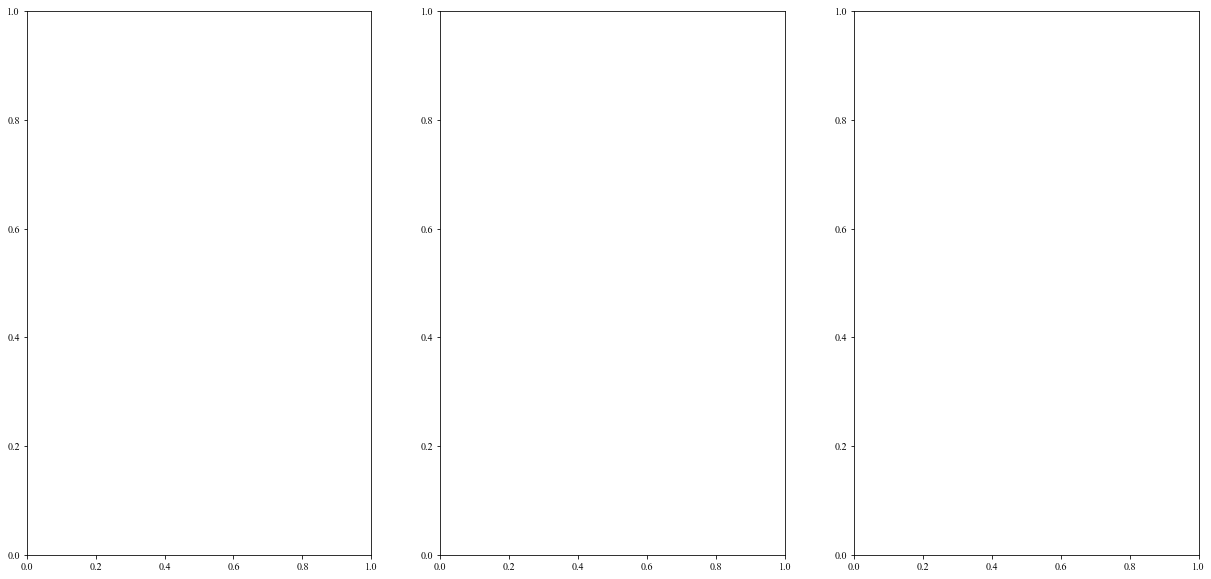

In [129]:
for i in range(len(cat)):
    
    cata = cat.iloc[i]
    eq_time = UTCDateTime(cata['Time'])
    eq_lon  = cata['Lon']
    eq_lat  = cata['Lat']
    mag = cata['Mag']
    depth = cata['Depth']/1000
    if mag > 7: exg = 0.3
    else : exg = 8
    
    yyyy = eq_time.year
    mm = str(eq_time.month).zfill(2)
    dd = str(eq_time.day).zfill(2)
    hh = str(eq_time.hour).zfill(2)
    minn = str(eq_time.minute).zfill(2)
    plt.figure(1,figsize=(21,10))
    ax1 = plt.subplot(131)
    ax2 = plt.subplot(132)
    ax3 = plt.subplot(133)
    if yyyy == 2016 :  #2021 > yyyy > 2017 :
        dist,azi,baz = gps2dist_azimuth(eq_lat,eq_lon,40.4821,43.7842) ##ZARN station
        dist = dist/1000
        def_deg = kilometer2degrees(dist)
        if def_deg <=90: 
            print(i,eq_time)
            min_arrivals = model.get_travel_times(source_depth_in_km=depth,distance_in_degree=def_deg-1,phase_list=['P','S'])
            max_arrivals = model.get_travel_times(source_depth_in_km=depth,distance_in_degree=def_deg+1,phase_list=['P','S'])
            min_arrP = min_arrivals[0].time; min_arrS = min_arrivals[1].time
            max_arrP = max_arrivals[0].time; max_arrS = max_arrivals[1].time
            ax1.plot([min_arrP,max_arrP],[def_deg-1,def_deg+1],c='r',ls='--',alpha=0.4) 
            ax2.plot([min_arrP,max_arrP],[def_deg-1,def_deg+1],c='r',ls='--',alpha=0.4) 
            ax3.plot([min_arrP,max_arrP],[def_deg-1,def_deg+1],c='r',ls='--',alpha=0.4) 
            ax1.plot([min_arrS,max_arrS],[def_deg-1,def_deg+1],c='b',ls='--',alpha=0.4) 
            ax2.plot([min_arrS,max_arrS],[def_deg-1,def_deg+1],c='b',ls='--',alpha=0.4) 
            ax3.plot([min_arrS,max_arrS],[def_deg-1,def_deg+1],c='b',ls='--',alpha=0.4) 
            for net in network : #['AM','TG','GO','IU']
                if net == 'AM' or net == 'TG' :
                    NET_DIR = f'{DATA_DIR}{net}'
                    NET_PZs = f'{PZ_DIR}/{net}'
                    eq_DIR =  f'{NET_DIR}/{yyyy}{mm}{dd}{hh}{minn}'
                    if net == 'AM' : color = 'k'
                    elif net == 'TG' : color = 'slategrey'
                    for path in sorted(glob.glob(f'{eq_DIR}/*Z')):
                        STA = path.rsplit('.',2)[1]
                        print(STA)
                        st_lat = (df['lat'][ (df['network'] == net ) & (df['station'] == STA) ]).item()
                        st_lon = (df['lon'][ (df['network'] == net ) & (df['station'] == STA) ]).item()

                        dist,azi,baz = gps2dist_azimuth(eq_lat,eq_lon,st_lat,st_lon)
                        dist = dist/1000
                        deg = kilometer2degrees(dist)   
                        try:
                            st = Stream()
                            for datapath in glob.glob(f'{eq_DIR}/*{STA}.HH?'):
                                st += read(datapath)
                            st.merge()
                            st.detrend('linear')
                            st.detrend('demean')
                            st.taper(0.05,type='cosine')
                            st.filter('bandpass',freqmin=freqmin,freqmax=freqmax,corners=4,zerophase=True)

                            st.rotate('NE->RT',back_azimuth=baz)

                            HHR = st.select(component='R')[0]
                            HHZ = st.select(component='Z')[0]
                            HHT = st.select(component='T')[0]

                            times= st[0].times()
                            HHZ = HHZ.data / mmm
                            HHR = HHR.data / mmm
                            HHT = HHT.data / mmm

                            ax1.set_title('Z component',fontsize=12)
                            ax1.plot(times,HHZ*exg+deg,lw=1.5,color=color)
                            ax1.set_xlabel('Time after origin time (s)',fontsize=12)
                            ax1.set_ylabel('Distence (degree)',fontsize=12)
                            ax1.set_xlim(0,1800)
                            ax2.set_title('R component',fontsize=12)
                            ax2.plot(times,HHR*exg+deg,lw=1.5,color=color)
                            ax2.set_xlabel('Time after origin time (s)',fontsize=12)
                            ax2.set_xlim(0,1800)
                            ax3.set_title('T component',fontsize=12)
                            ax3.plot(times,HHT*exg+deg,lw=1.5,color=color)
                            ax3.set_xlabel('Time after origin time (s)',fontsize=12)
                            ax3.text(1830,deg,STA,fontsize=12)
                            ax3.set_xlim(0,1800)
                        except: print(STA )
            plt.suptitle(f'{eq_time}\n lat: {eq_lat} lon: {eq_lon} dep: {depth}km  Mag:{mag}\nbp: {freqmin}-{freqmax}Hz', fontsize=20)
            plt.savefig(f'{FIG_DIR}/{eq_time}.png',dpi=200,facecolor='white')
            print('===============================figure save')
            plt.close()

In [96]:
qwqw= model.get_travel_times(source_depth_in_km=depth,distance_in_degree=def_deg-3)

In [106]:
print(min_arrivals)

2 arrivals
	P phase arrival at 727.628 seconds
	S phase arrival at 1331.044 seconds


In [125]:
 glob.glob(f'{eq_DIR}/*{STA}.HH?')

['/Volumes/home/Research/DataBase/00_AM/201906281551/2019179155131.00.ARZA.HHZ']